- 머신러닝/딥러닝 문제해결 프로세스: 크게 ‘경진대회 이해’ → ‘탐색적 데이터 분석’ → ‘베이스라인 모델’ → ‘성능 개선’ 순으로 진행

- 타깃값 변환: 타깃값이 정규분포에 가까울수록 회귀 모델의 성능이 좋음. 한쪽으로 치우친 타깃값은 로그변환하면 정규분포에 가까워지고, 결괏값을 지수변환하면 원래 타깃값 형태로 복원됨.
- 이상치 제거: 훈련 데이터에서 이상치를 제거하면 일반화 성능이 좋아질 수 있음
- 파생 피처 추가: 기존 피처를 분해/조합하여 모델링에 도움되는 새로운 피처를 만들 수 있음
- 피처 제거: 반대로 불필요한 피처를 제거하면 성능도 좋아지고, 훈련 속도도 빨라짐
선형회귀, 릿지, 라쏘 모델: 회귀 문제를 푸는 대표적인 모델, but 너무 기본적이라 실전에서 단독으로 최상의 성능을 기대하기는 어려움
- 랜덤 포레스트 회귀 모델: 여러 모델을 묶어 (대체로) 더 나은 성능을 이끌어내는 간단하고 유용한 기법입니다.
- 그리드서치: 교차 검증으로 최적의 하이퍼파라미터 값을 찾아주는 기법


In [27]:
!unzip /content/bike-sharing-demand.zip

Archive:  /content/bike-sharing-demand.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [28]:
import numpy as np
import pandas as pd

In [29]:
train, test = pd.read_csv('/content/train.csv'), pd.read_csv('/content/test.csv')

In [30]:
train.shape , test.shape

((10886, 12), (6493, 9))

In [31]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [32]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [33]:
pd.read_csv('/content/sampleSubmission.csv').head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [34]:
# 결측치 확인
train.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [35]:
# 수치형 데이터와 범주형 데이터 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [36]:
print(train['datetime'][0])
print(train['datetime'][0].split())
print(train['datetime'][0].split()[0])
print(train['datetime'][0].split()[1])

2011-01-01 00:00:00
['2011-01-01', '00:00:00']
2011-01-01
00:00:00


In [37]:
# 문자열데이터를 년 월 일로 분리
# train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# pd.to_datetime(train['datetime']).dt.year
# pd.to_datetime(train['datetime']).dt.month
# pd.to_datetime(train['datetime']).dt.day
# pd.to_datetime(train['datetime']).dt.hour
# pd.to_datetime(train['datetime']).dt.minute
# pd.to_datetime(train['datetime']).dt.second

파생변수

In [64]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['date'] = train['datetime'].dt.date
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['weekday'] = train['datetime'].dt.weekday
train['weekday_name'] = train['datetime'].dt.day_name()

In [71]:
train['season_name'] = train['season'].map({1:'봄', 2:'여름', 3:'가을', 4:'겨울'})
train['weather_name'] = train['weather'].map({1:'맑음', 2:'구름 조금', 3:'약한눈비천둥', 4:'강한눈비천둥'})
train['workingday_name'] = train['workingday'].map({0:'공휴일', 1:'근무일'})

시각화

<ipython-input-72-c740606a2e8c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['count'])


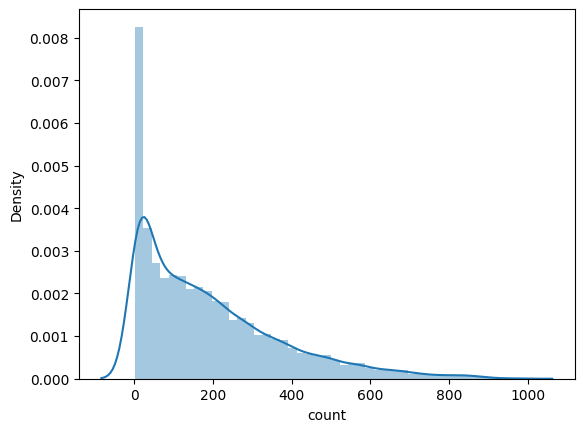

In [72]:
# 분포도 - 정답  데이턴편향여부 확인
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(train['count'])
plt.show()

회귀 문제는 데이터가 정규분포형태를 취하면 예측율이높다 - 특성이 골고루 반영되서 학습에 유리함

<ipython-input-75-de0344519b82>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train['count']))


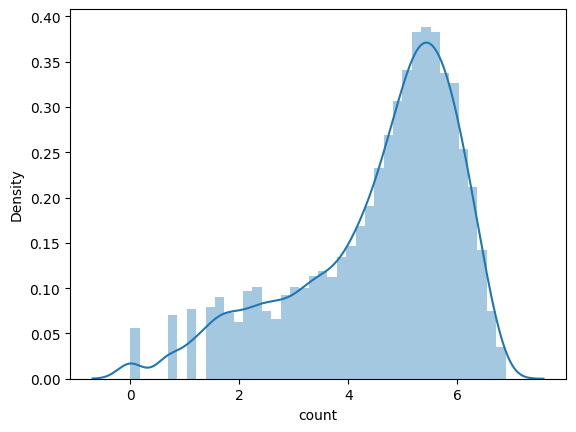

In [75]:
import numpy as np
sns.distplot(np.log(train['count']))
plt.show()